My first model for computer vision _video_✨

In [14]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}, {torch.__version__}, {torchvision.__version__}")

cuda, 2.4.1+cu121, 0.19.1+cu121


### 1. Getting dataset
* FashioMNIST

In [15]:
train_data = datasets.FashionMNIST(
    root='data', # where to download data to
    train=True, # do we want the training dataset
    download=True, # do we ant to download it
    transform= torchvision.transforms.ToTensor(), #transform the data to tensor
    target_transform=None # how to transform the label/targets
)

test_data = datasets.FashionMNIST(
    root= 'data',
    train= False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [16]:
len(train_data), len(test_data)

(60000, 10000)

In [17]:
# see 1st training example

image, label = train_data[0]
# image, label

In [18]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [20]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [21]:
image.shape, label
class_names[label]

'Ankle boot'

## 1.2 Visualizing data

Text(0.5, 1.0, '9')

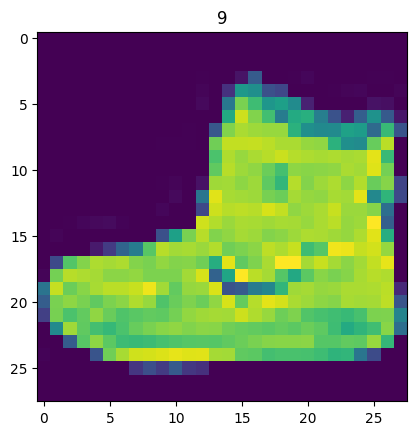

In [22]:
image, label = train_data[0]

plt.imshow(image.squeeze()); plt.title(label)

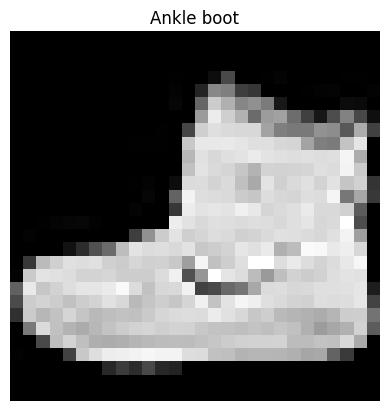

In [23]:
import matplotlib.pyplot as plt

plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

# Get the current axis and turn it off
ax = plt.gca()
ax.set_axis_off()

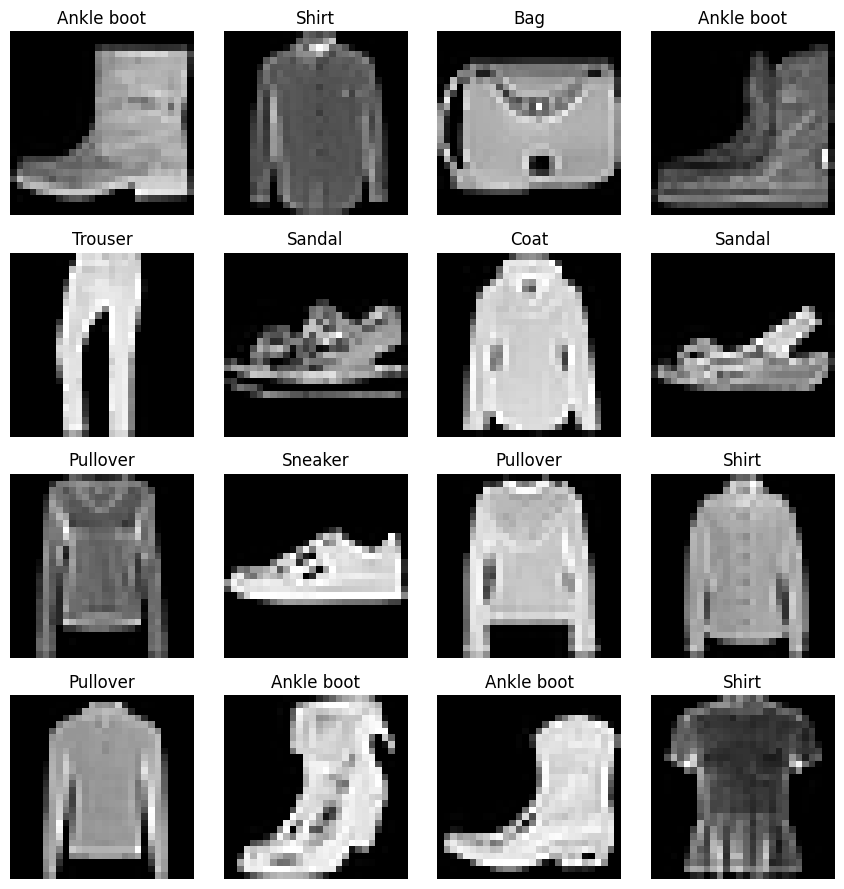

In [24]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), (1,)).item()  # Corrected randint usage
    img, label = train_data[random_idx]
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(class_names[label])
    ax.axis('off')
    plt.tight_layout()

Is this a linear or a non-linear problem?

In [31]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [34]:
## 2. Prepare Dataloader

from torch.utils.data import DataLoader

# HYPERPARAMETERS
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1546cb7fce0>,
 <torch.utils.data.dataloader.DataLoader at 0x1546cada360>)

In [39]:
print(f'dataloaders: {train_dataloader, test_dataloader}')
print(f'len or train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'len or test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001546CB7FCE0>, <torch.utils.data.dataloader.DataLoader object at 0x000001546CADA360>)
len or train dataloader: 1875 batches of 32
len or test dataloader: 313 batches of 32


In [42]:
# check whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
label: 2, label size: torch.Size([])


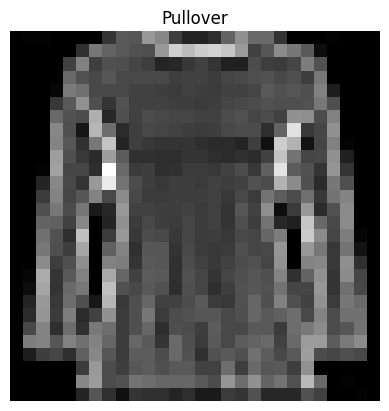

In [80]:
# show sample

# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

## Model 0: Building baseline model
* best practice  to start with a baseline model
* a simple model to try and improve upon with subsequent models or experiments

In [84]:
# create a flatten layer

flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]
x.shape

# flatten the sample 
output = flatten_model(x) # perform forward pass

print(x.shape) # before flattening
print(output.shape) # after flatenning

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [ ]:
from torch import nn

class FashioMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [96]:
torch.manual_seed(42)

# setup model with input params
model_0 = FashioMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0

FashioMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [98]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.1680,  0.2322,  0.2701,  0.0274,  0.6386,  0.3092,  0.3212,  0.2810,
         -0.1581, -0.1608]], grad_fn=<AddmmBackward0>)

In [101]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### setup loss fn, optimizer, eval metrics
* loss - nn.CrossEntrophyLoss
* optim - torch.optim.SGD
* eval_met - acc

In [103]:
import requests
from pathlib import Path

HELPER_FUNCTIONS_URL = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py'
HELPER_FUNCTIONS_PATH = Path('helper_functions.py')

def download_helper_functions():
    """
    Downloads the helper_functions.py file if it does not already exist.
    """
    if HELPER_FUNCTIONS_PATH.is_file():
        print(f"'{HELPER_FUNCTIONS_PATH.name}' already exists, skipping download...")
    else:
        print(f"Downloading '{HELPER_FUNCTIONS_PATH.name}'...")
        try:
            response = requests.get(HELPER_FUNCTIONS_URL)
            response.raise_for_status()  # Raise an error for bad responses
            with open(HELPER_FUNCTIONS_PATH, 'wb') as file:
                file.write(response.content)
            print(f"'{HELPER_FUNCTIONS_PATH.name}' downloaded successfully.")
        except requests.exceptions.RequestException as e:
            print(f"An error occurred while downloading '{HELPER_FUNCTIONS_PATH.name}': {e}")

download_helper_functions()

'helper_functions.py' already exists, skipping download...


In [106]:
# import accuracy metric

from helper_functions import accuracy_fn

#setup loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### 3.2 Creating a function to time experiments

* track: models performance(loss and acc values), how fast it runs

In [111]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    
    """
    Prints difference between start and end time
    """

    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} sec")
    return total_time

In [121]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 sec


7.95999076217413e-05

### Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through batches, perform training steps, calc train loss __per batch__
3. Loop though testing batches, perform testing steps, calculate the test loss per batch
4. print whats happening
5. time it all

In [124]:
# import tqdm
from tqdm.auto import tqdm

# set the seed, start the timer

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (keep small for faster training time)
epochs = 3

# create training and test loop

for epoch in tqdm

SyntaxError: expected ':' (1005490275.py, line 14)